In [1]:
import csv
import numpy as np
from heapq import nsmallest
import matplotlib.pyplot as plt

In [2]:
train_data = np.loadtxt("../data/galaxies_train.csv", delimiter=",", skiprows=1)
test_data = np.loadtxt("../data/galaxies_test.csv", delimiter=",", skiprows=1)

In [3]:
X_train = train_data[:,1:]
t_train = train_data[:,0]
X_test = test_data[:,1:]
t_test = test_data[:,0]
print("Number of training instances: %i" % X_train.shape[0])
print("Number of test instances: %i" % X_test.shape[0])
print("Number of attributes: %i" % X_train.shape[1])

Number of training instances: 500
Number of test instances: 500
Number of attributes: 10


In [4]:
# NOTE: You are supposed to use this strucuture, i.e., 
# the pre-defined functions and variables. If you 
# have difficulties to keep this structure, you ARE 
# ALLOWED to adapt/change the code structure slightly!
# You might also want to add additional functions or
# variables.

class NearestNeighborRegressor:
    
    def __init__(self, n_neighbors=3, dist_measure="euclidean", dist_matrix=None):
        """
        Initializes the model.
        
        Parameters
        ----------
        n_neighbors : The number of nearest neigbhors (default 1)
        dist_measure : The distance measure used (default "euclidean")
        dist_matrix : The distance matrix if needed (default "None")
        """
        
        self.n_neighbors = n_neighbors
        self.dist_measure = dist_measure
        self.dist_matrix = dist_matrix
        self.lam = 1.0
    
    def fit(self, X, t):
        """
        Fits the nearest neighbor regression model.

        Parameters
        ----------
        X : Array of shape [n_samples, n_features]
        t : Array of length n_samples
        """ 
        
        self.X_train = X
        self.t_train = t
    
    def predict(self, X):
        """
        Computes predictions for a new set of points.

        Parameters
        ----------
        X : Array of shape [n_samples, n_features]

        Returns
        -------
        predictions : Array of length n_samples
        """         
        
        predictions = []
        if self.dist_measure == "euclidean":
            for i in range(X.shape[0]):
                distance = []
                for j in range(X_train.shape[0]):
                    distance.append(np.linalg.norm(X_train[j] - X[i]))
                smallestN = nsmallest(self.n_neighbors, distance)
                tempFeatures = np.zeros((self.n_neighbors, X.shape[1]))
                tempLabels = []
                for j in range(self.n_neighbors):
                    tempFeatures[j] = self.X_train[distance.index(smallestN[j])]
                    tempLabels.append(self.t_train[distance.index(smallestN[j])])
                tempLabels = np.array(tempLabels)
                predictionWeights = np.linalg.lstsq(tempFeatures.T.dot(tempFeatures) + self.lam * np.identity(X.shape[1]), tempFeatures.T.dot(tempLabels))
                predictions.append(predictionWeights[0].dot(X[i]))
            predictions = np.array(predictions)
            print("predictions: ", predictions)
            return predictions

/tmp/ipykernel_36246/1129078938.py:65: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  predictionWeights = np.linalg.lstsq(tempFeatures.T.dot(tempFeatures) + self.lam * np.identity(X.shape[1]), tempFeatures.T.dot(tempLabels))


predictions:  [1.33495055 1.17050342 1.36574    1.33465168 1.58530452 1.16471285
 1.18005701 1.29351468 0.98935843 1.46816969 1.6237829  1.54787247
 4.53476527 1.50648922 1.40303263 1.58913786 1.3968534  0.85314294
 2.24589092 1.24289257 1.51164252 1.11786147 1.20735003 1.18672363
 1.58384453 1.3947873  1.33540438 1.42160518 1.17190795 1.25595168
 1.32852687 1.31160139 1.50705597 3.57399118 1.44304462 1.24981758
 1.28712658 1.51137101 1.1851108  1.53227181 1.44191271 1.42630981
 1.28451852 1.59583381 1.50484121 1.67788563 2.24418687 1.19098375
 2.30970313 1.43709726 1.60280683 1.56674326 1.17543433 1.52383261
 0.38311156 0.96768458 1.16024891 3.45430401 1.3784538  1.67619635
 1.10434539 1.20087174 1.28971706 1.45559259 1.61459728 1.24151808
 2.87537719 1.38748228 1.39065273 1.55453854 1.54800114 1.41301777
 0.52283616 1.57222601 1.22514395 1.36316132 1.19361531 1.17710599
 2.72706376 1.4585071  1.22357661 1.47929046 0.6384468  3.08051238
 1.50634356 1.28398294 1.23876897 1.29863422 1.2

<function matplotlib.pyplot.show(close=None, block=None)>

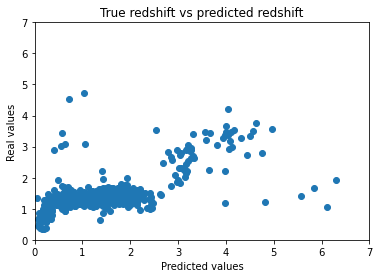

In [5]:
KNN = NearestNeighborRegressor(n_neighbors = 15)
KNN.fit(X_train, t_train)
prediction = KNN.predict(X_test)
print("prediction: ", prediction)
def rmse(t, tp):
        N = t.shape[0]
        sum = 0.0
        for i in range (N):
            sum = sum + (t[i] - tp[i]) ** 2
        rmse = np.sqrt(sum/N)
        return rmse
rmseTest = rmse(prediction, t_test)
print("RMSE: ", rmseTest)
plt.scatter(t_test, prediction)
plt.title("True redshift vs predicted redshift")
plt.ylabel("Real values")
plt.xlabel("Predicted values")
plt.xlim([0,7])
plt.ylim([0,7])
plt.show